Import modules

In [210]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.10.12
import os

from IPython.display import Image
from IPython.display import display

# numpy 1.23.5
import numpy as np

# pandas 1.5.3
import pandas as pd

# scikit-learn 1.2.2
from scipy import interp
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import auc, confusion_matrix,  f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# cycler 0.10.0
# from cycler import cycler

# matplotlib  3.7.1
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot

# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")

In [211]:
# load utility classes/functions e.g., plot_decision_regions()
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/04-1_Perceptron_Adaline/lab04lib.py", "lab04lib.py")

import warnings
warnings.filterwarnings("ignore")

Load the training data and preprocess them into the desired pattern

In [212]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

# np.unique(data[:len(data.columns)-1])
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)

data = data.drop(len(data.columns)-2, axis=1)

data.groupby(['arrhythmia']).size()

data = data._get_numeric_data()
# print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
# data.head(3)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


452 rows and 280 columns


Do Standardization and split the data into training set and testing set

In [213]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)
# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

[0 1]
(452, 274)


Building of a self-designed Logistic Regression model (Complete the TODO parts provided below)

In [214]:
class LogisticRegression(object):

    def __init__(self, eta=0.005, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)

            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            # print("cost %s" % np.isnan(cost).any())
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        # TODO
        # use Logistic loss
        
        epsilon = 1e-10
        loss = -(y * np.log(output + epsilon) + (1 - y) * np.log(1 - output + epsilon))
        
        
        # loss = -y * np.log(output) - (1 - y) * np.log(1 - output)
        # # substitute nan in loss with 0
        # loss = np.nan_to_num(loss)
        
        return sum(loss)/len(y)
        # pass

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        p = 1 / (1 + np.exp(-z))
        return p
        # pass

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        prediction = np.where(self.net_input(X) > 0.5, 1, 0)
        return prediction
        # pass
     

Plotting the loss curve.

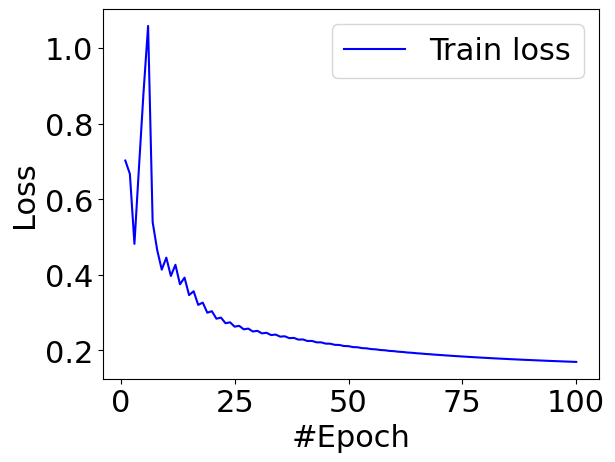

Last Cost: 0.16948368231501776


In [215]:
# Plotting the loss curve.

lr = LogisticRegression(eta=0.004, n_epoch=100, random_state=1)
lr.fit(X_train_std, y_train)
plt.plot(
    range(1, len(lr.cost_) + 1),
    lr.cost_,
    color = 'blue',
    label = 'Train loss'
)
plt.legend(loc = "upper right")
plt.xlabel('#Epoch')
plt.ylabel('Loss')
plt.savefig('output/Lab06-1_106062541.png', dpi = 300)
plt.show()

print("Last Cost: %s" % lr.cost_[-1])

Plotting of the confusion matrix. (Label 0 as positive)
Computing the F1-score of this confusion matrix. The F1-score should be at least 0.75

[[34  9]
 [10 38]]


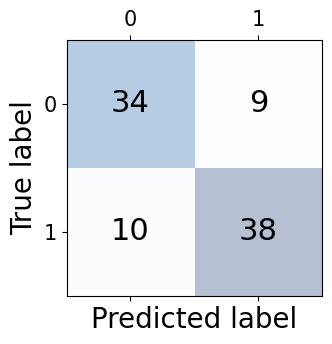

precision: 0.809, recall: 0.792, f1: 0.800


In [216]:
# Plotting of the confusion matrix. (Label 0 as positive)

y_pred = lr.predict(X_test_std)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-2.png', dpi=300)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

pre = precision_score(y_true=y_test, y_pred=y_pred)
rec = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print("precision: %.3f, recall: %.3f, f1: %.3f" % (pre, rec, f1))